In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드

* 품질에 대한 분류

In [2]:
dt = pd.read_csv('cars_part_quality.csv')

In [3]:
dt.head()

date_time   T1   T2   T3   T4   T5   T6   T7   T8   T9  T10  T11  \
0  2015-01-04 0:05  277  326  273  322  335  352  505  501  670  326  379   
1  2015-01-04 1:05  277  253  272  320  333  355  500  501  687  337  396   
2  2015-01-04 2:05  262  218  260  326  336  330  505  499  443  347  399   
3  2015-01-04 3:05  243  238  252  327  329  308  520  498  540  342  387   
4  2015-01-04 4:05  236  238  245  323  320  318  522  501  524  343  371   

   T12  T13  T14  T15  observe1  observe2  quality  
0  337  231  236  242    153.77      7.90      392  
1  335  234  242  230    158.27      6.96      384  
2  332  243  251  240    153.36      7.29      393  
3  334  257  258  246    153.21      7.11      399  
4  344  264  263  265    195.71      7.97      400

# 데이터 확인

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  20000 non-null  object 
 1   T1         20000 non-null  int64  
 2   T2         20000 non-null  int64  
 3   T3         20000 non-null  int64  
 4   T4         20000 non-null  int64  
 5   T5         20000 non-null  int64  
 6   T6         20000 non-null  int64  
 7   T7         20000 non-null  int64  
 8   T8         20000 non-null  int64  
 9   T9         20000 non-null  int64  
 10  T10        20000 non-null  int64  
 11  T11        20000 non-null  int64  
 12  T12        20000 non-null  int64  
 13  T13        20000 non-null  int64  
 14  T14        20000 non-null  int64  
 15  T15        20000 non-null  int64  
 16  observe1   20000 non-null  float64
 17  observe2   20000 non-null  float64
 18  quality    20000 non-null  int64  
dtypes: float64(2), int64(16), object(1)
memory usa

In [5]:
dt.describe().T

count        mean        std     min     25%     50%       75%  \
T1        20000.0  250.924050  31.329591 -142.00  229.00  251.00  272.0000   
T2        20000.0  250.460400  30.437637 -120.00  229.00  251.00  272.0000   
T3        20000.0  250.941350  30.486846  -96.00  230.00  251.00  272.0000   
T4        20000.0  349.915200  45.898751 -703.00  328.00  350.00  372.0000   
T5        20000.0  349.849150  40.176972 -763.00  328.00  350.00  372.0000   
T6        20000.0  349.735150  37.805678 -186.00  328.00  350.00  372.0000   
T7        20000.0  500.993550  61.273840 -255.00  464.00  501.00  538.0000   
T8        20000.0  500.566350  66.248350 -759.00  463.00  501.00  537.0000   
T9        20000.0  500.986450  61.678886 -441.00  464.00  501.00  538.0000   
T10       20000.0  349.428650  39.381966 -128.00  327.00  349.00  372.0000   
T11       20000.0  349.141550  39.398645 -407.00  327.00  350.00  371.0000   
T12       20000.0  350.128800  40.680966 -594.00  328.00  350.00  372.0000   
T13       20000.0  249.694800  31.326242  -82.00  229.00  249.00  270.0000   
T14       20000.0  249.503050  30.335624 -106.00  229.00  250.00  270.0000   
T15       20000.0  249.581900  30.378768 -128.00  229.00  249.00  270.0000   
observe1  20000.0  174.678360  14.454902  145.00  162.33  174.49  186.8725   
observe2  20000.0    7.503237   1.135711    3.12    6.74    7.52    8.2700   
quality   20000.0  403.123050  45.951187  221.00  373.00  409.00  439.0000   

              max  
T1         568.00  
T2         564.00  
T3         546.00  
T4        1299.00  
T5        1178.00  
T6         886.00  
T7        1489.00  
T8        2492.00  
T9        1294.00  
T10       1136.00  
T11        725.00  
T12        944.00  
T13        879.00  
T14        737.00  
T15        542.00  
observe1   206.68  
observe2    11.60  
quality    505.00

# 전처리

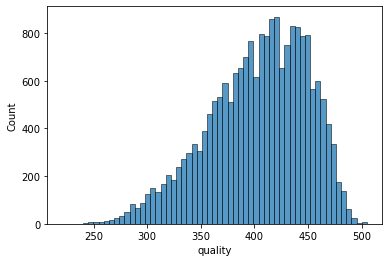

In [6]:
sns.histplot(dt.iloc[:, 1:], x='quality');

## 품질에 따른 타겟 인코딩

* y
    * y < 33%
        * 나쁨(0)
    * 33% <= y < 66%
        * 보통(1)
    * 66% <= y
        * 좋음(2)

In [7]:
dt = dt.sort_values(['quality']).reset_index(drop=True)
y = []

for i in range(len(dt)):
    if i < int(np.round(len(dt)*0.33)):
        y.append(0)
    elif int(np.round(len(dt)*0.33)) <= i < int(np.round(len(dt)*0.66)):
        y.append(1)
    else:
        y.append(2)

y = np.array(y)

* 타겟의 개수

In [8]:
counts = pd.DataFrame(y).value_counts().sort_index()
counts

0    6600
1    6600
2    6800
dtype: int64

## feature 분할 및 정규화

In [9]:
x = dt.iloc[:,1:-1]
col = x.columns
x.head()

T1   T2   T3   T4   T5   T6   T7   T8   T9  T10  T11  T12  T13  T14  T15  \
0  206  204  204  421  310  421  576  583  665  317  326  305  220  210  206   
1  206  215  205  305  299  288  588  617  598  437  383  404  246  202  191   
2  195  197  207  398  307  474  555  574  586  302  282  308  200  205  211   
3  260  247  247  312  324  308  590  607  599  355  339  353  215  202  203   
4  237  233  242  313  305  322  579  567  576  337  346  353  230  228  225   

   observe1  observe2  
0    158.84      7.54  
1    165.98      7.59  
2    159.45      8.97  
3    154.51      9.45  
4    159.95      7.58

In [10]:
from sklearn.model_selection import train_test_split
import sklearn.preprocessing 

scaler = sklearn.preprocessing.MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.49014085, 0.47368421, 0.46728972, ..., 0.49850746, 0.22438392,
        0.52122642],
       [0.49014085, 0.48976608, 0.46884735, ..., 0.4761194 , 0.34014267,
        0.52712264],
       [0.47464789, 0.46345029, 0.47196262, ..., 0.50597015, 0.23427367,
        0.68985849],
       ...,
       [0.62112676, 0.61403509, 0.61682243, ..., 0.63731343, 0.62467575,
        0.30306604],
       [0.62957746, 0.63011696, 0.63395639, ..., 0.6358209 , 0.60116732,
        0.51179245],
       [0.61267606, 0.5877193 , 0.60124611, ..., 0.6358209 , 0.66034371,
        0.57665094]])

In [11]:
trainx, testx, trainy, testy  = train_test_split(x, y, test_size=0.2)

## 모델 정의

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model = DecisionTreeClassifier()

In [14]:
model = model.fit(trainx, trainy)

## 결과 확인

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [16]:
def get_metrics(y_test, y_predicted):
    display(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_predicted, name='Predicted')).\
            style.background_gradient(cmap='Reds'))
    
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    
    print(f'\naccuracy \t= {round(accuracy, 3)} \
    \nprecision \t= {round(precision, 3)} \
    \nrecall \t\t= {round(recall, 3)} \
    \nf1-score \t= {round(f1, 3)}')

### train set

In [17]:
get_metrics(trainy, model.predict(trainx))


accuracy 	= 1.0     
precision 	= 1.0     
recall 		= 1.0     
f1-score 	= 1.0


### test set

In [18]:
get_metrics(testy, model.predict(testx))


accuracy 	= 0.768     
precision 	= 0.768     
recall 		= 0.768     
f1-score 	= 0.768


#### 하이퍼 파라미터 조정

In [19]:
model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(trainx,trainy)
get_metrics(testy, model.predict(testx))


accuracy 	= 0.774     
precision 	= 0.776     
recall 		= 0.774     
f1-score 	= 0.775


In [20]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=20)
model = model.fit(trainx,trainy)
get_metrics(testy, model.predict(testx))


accuracy 	= 0.786     
precision 	= 0.788     
recall 		= 0.786     
f1-score 	= 0.787


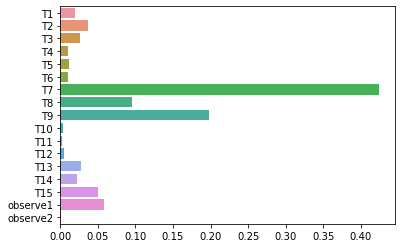

In [21]:
sns.barplot(x=model.feature_importances_, y=col);

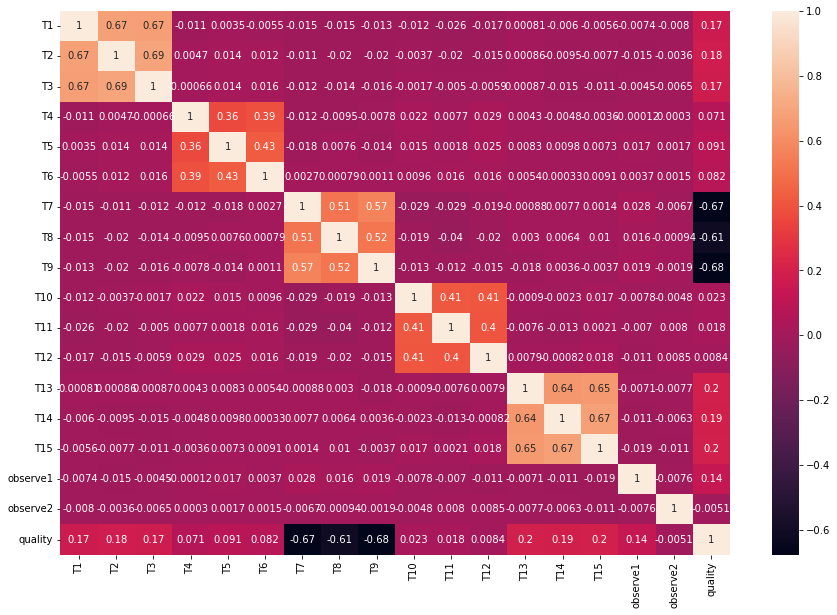

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(dt.corr(), annot=True);

# 랜덤 포레스트 적용 예

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier(n_estimators = 100, 
                              criterion = 'entropy',
                              max_depth = 12,
                              min_samples_leaf = 20, # 분류 시 남길 데이터
                              min_samples_split = 20, # 최종 분류 시 남길 데이터의 수
                              random_state = 0,
                              n_jobs = -1)  # 학습에 모든 cpu 자원 사용

In [25]:
model = RandomForestClassifier()

In [26]:
trainy.shape

(16000,)

In [27]:
model = model.fit(trainx, trainy)

In [28]:
get_metrics(testy, model.predict(testx))


accuracy 	= 0.85     
precision 	= 0.852     
recall 		= 0.85     
f1-score 	= 0.851


In [32]:
res = []
opt_acc, opt_tree = 0, 0
for i in range(1, 21):
    model = RandomForestClassifier(n_estimators = i+1, 
                                max_depth = 12,
                                min_samples_leaf = 5,
                                min_samples_split = 5,
                                random_state = 3,
                                n_jobs = -1)
    model = model.fit(trainx, trainy)
    pred_test = model.predict(testx)
    acc = accuracy_score(testy, pred_test)
    if opt_acc <= acc:
        opt_acc, opt_tree = acc, i
    res.append(acc)
    
    print(f'{i}-tree acc: \t{round(acc*100, 3)}%')

print(f'\nbest tree and acc -> {opt_tree, round(opt_acc*100, 3)}')

1-tree acc: 	78.7%
2-tree acc: 	80.375%
3-tree acc: 	81.3%
4-tree acc: 	82.2%
5-tree acc: 	82.35%
6-tree acc: 	82.725%
7-tree acc: 	82.75%
8-tree acc: 	82.9%
9-tree acc: 	83.45%
10-tree acc: 	83.65%
11-tree acc: 	83.625%
12-tree acc: 	83.8%
13-tree acc: 	83.6%
14-tree acc: 	83.925%
15-tree acc: 	83.8%
16-tree acc: 	83.95%
17-tree acc: 	83.8%
18-tree acc: 	84.15%
19-tree acc: 	83.875%
20-tree acc: 	83.8%

best tree and acc -> (18, 84.15)


In [30]:
model = RandomForestClassifier(n_estimators = 1000, 
                                max_depth = 12,
                                min_samples_leaf = 5,
                                min_samples_split = 5,
                                random_state = 0,
                                n_jobs = -1)
  
model = model.fit(trainx, trainy)
get_metrics(testy, model.predict(testx))


accuracy 	= 0.846     
precision 	= 0.849     
recall 		= 0.846     
f1-score 	= 0.847


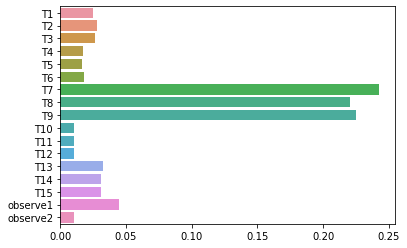

In [31]:
sns.barplot(x=model.feature_importances_, y=col);